<h1> SALES ANALYSIS

<h5>OBJECTIVE

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

-	What is the overall sales trend?
-	Which are the Top 10 products by sales?
-	Which are the Most Selling Products?
-	Which is the most preferred Ship Mode?
-	Which are the Most Profitable Category and Sub-Category?

<h4> Importing Required Libraries

In [110]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
# Importing dataset
salesdf = pd.read_excel('superstore_sales.xlsx')
salesdf

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [3]:
# First five rows of the dataset
print(salesdf.head())

          order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage          Tenex Lockers,

In [4]:
# count of rows and columns of the dataset
salesdf.shape

(51290, 21)

In [5]:
# Columns present in the dataset
salesdf.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
# Checking missing values
salesdf.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [7]:
# Generating descriptive statistics summary
salesdf.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [8]:
# Generating descriptive statistics summary with rounded values
salesdf.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


In [9]:
# A concise summary of the dataset
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

<h1> Exploratory Data Analysis

<h4> OVERALL SALES TREND

In [10]:
salesdf['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [11]:
salesdf['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [12]:
# Getting month year from order_date
salesdf['month_year'] = salesdf['order_date'].apply(lambda x: x.strftime('%Y-%m'))
salesdf['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [13]:
# grouping month_year by sales
df_trend = salesdf.groupby('month_year').sum()['sales'].reset_index()
df_trend

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


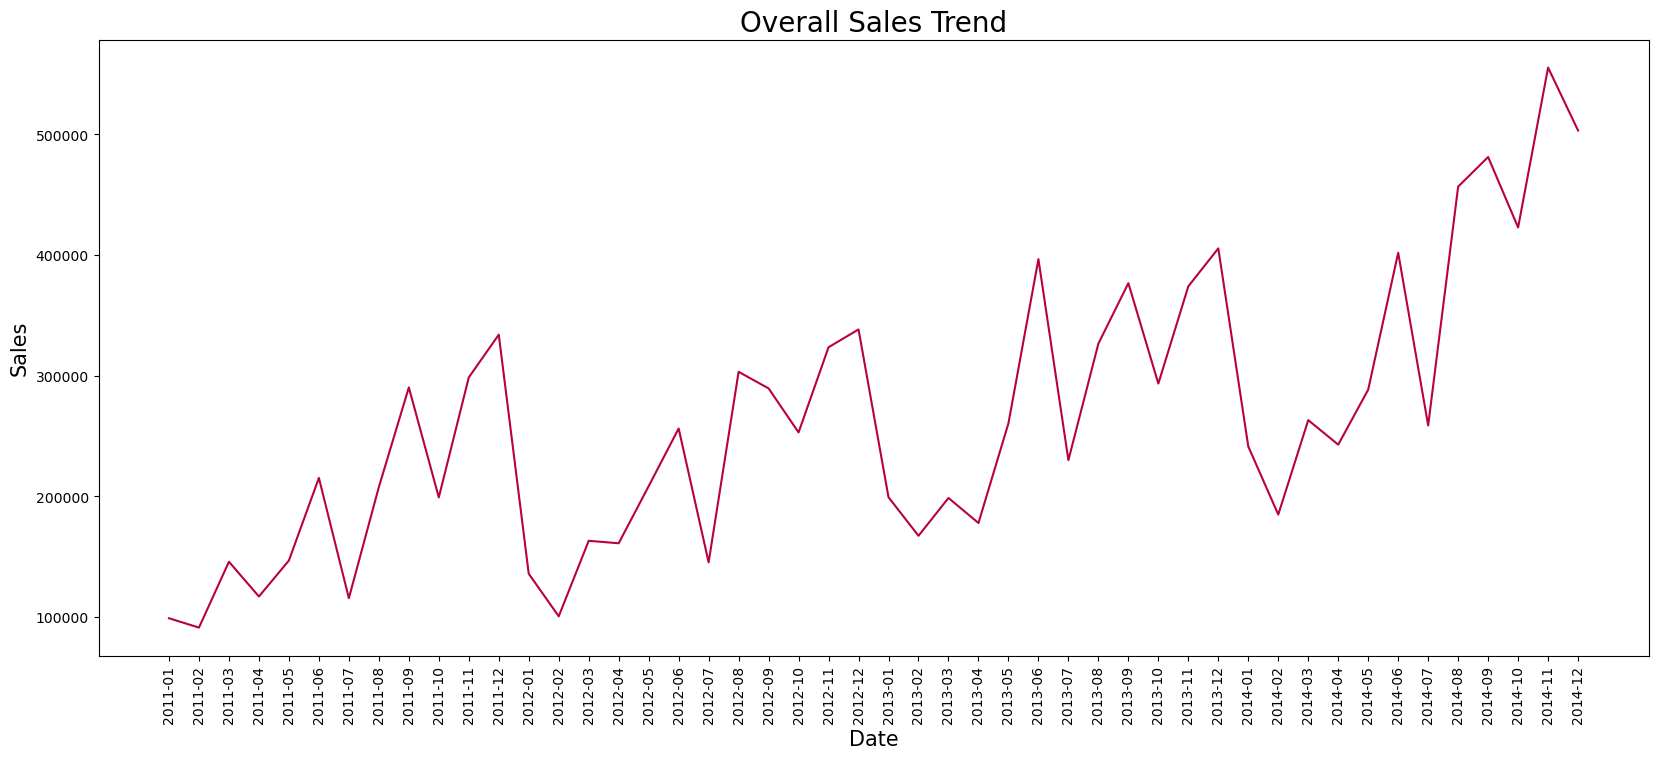

In [129]:
# Setting the figure size
plt.figure(figsize=(20, 8))
plt.plot(df_trend['month_year'], df_trend['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=10)

# Set the chart title and axis labels
plt.title('Overall Sales Trend', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Sales',fontsize=15)

# Show the chart
plt.show()

<h4>WHAT ARE THE TOP 10 PRODUCTS BY SALES?

In [15]:
salesdf['product_name']

0                                    Tenex Lockers, Blue
1                               Acme Trimmer, High Speed
2                                Tenex Box, Single Width
3                            Enermax Note Cards, Premium
4                             Eldon Light Bulb, Duo Pack
                              ...                       
51285    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl
51286            Wilson Jones Hole Reinforcements, Clear
51287             Hon Color Coded Labels, 5000 Label Set
51288             Hon Legal Exhibit Labels, Alphabetical
51289                                Bagged Rubber Bands
Name: product_name, Length: 51290, dtype: object

In [16]:
#Grouping Product name column
product_sales = pd.DataFrame(salesdf.groupby('product_name').sum()['sales'])

In [17]:
#Sorting product_sales in Descending order
product_sales = product_sales.sort_values('sales',ascending=False)
product_sales = product_sales.dropna()

In [18]:
product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [19]:
print(product_sales.columns)

Index(['sales'], dtype='object')


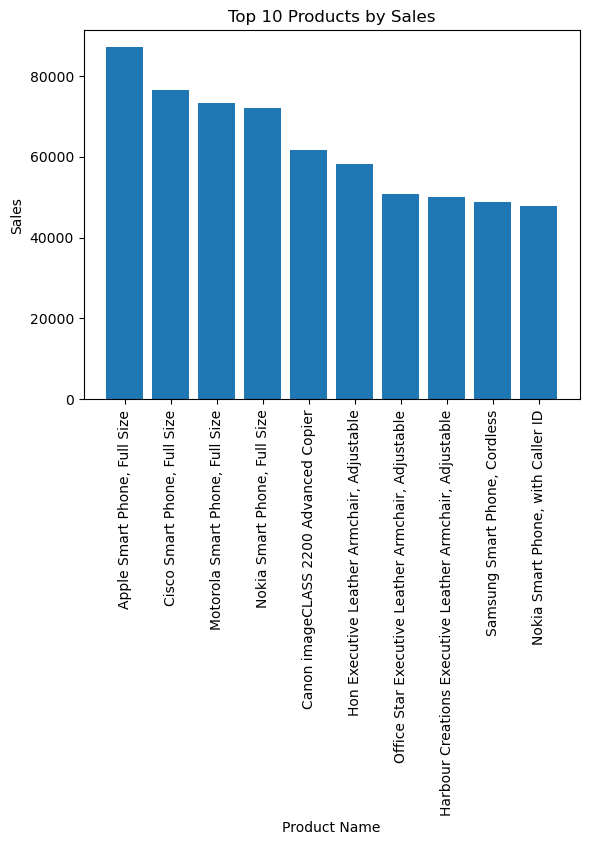

In [20]:
# Get the top 10 products by sales
top_products = salesdf.groupby('product_name')['sales'].sum().nlargest(10)

# Create a bar chart for the top 10 products by sales
plt.bar(top_products.index, top_products.values)

# Set the chart title and axis labels
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.show()

<h4> MOST SELLING PRODUCTS

In [54]:
#Grouping product name
most_sell_prod= pd.DataFrame(salesdf.groupby('product_name').sum()['quantity']).nlargest(10,'quantity')

In [46]:
most_sell_prod=most_sell_prod.sort_values('quantity',ascending=False)

In [47]:
most_sell_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


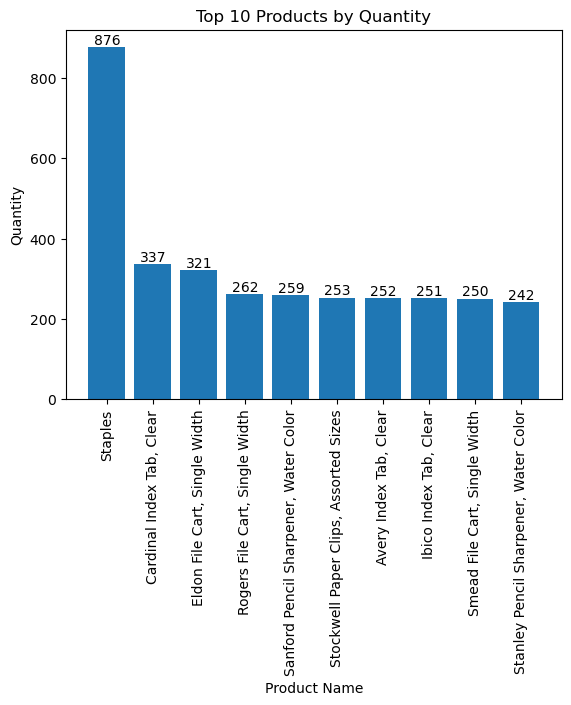

In [73]:
# Get the top 10 products by sales
most_products = salesdf.groupby('product_name').sum()['quantity'].nlargest(10)

# Create a bar chart for the top 10 products by sales
plt.bar(most_products.index, most_products.values)

# Set the chart title and axis labels
plt.title('Top 10 Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels to the bars
for i, v in enumerate(most_products.values):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Show the chart
plt.show()

<h4> WHAT IS THE MOST PREFERRED SHIP MODE?

In [74]:
salesdf['ship_mode']

0        Standard Class
1        Standard Class
2          Second Class
3          Second Class
4        Standard Class
              ...      
51285    Standard Class
51286    Standard Class
51287      Second Class
51288    Standard Class
51289    Standard Class
Name: ship_mode, Length: 51290, dtype: object

In [78]:
#Getting the counts of different ship modes
ship_mode_counts = salesdf['ship_mode'].value_counts()
ship_mode_counts

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

C:\Users\Public\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

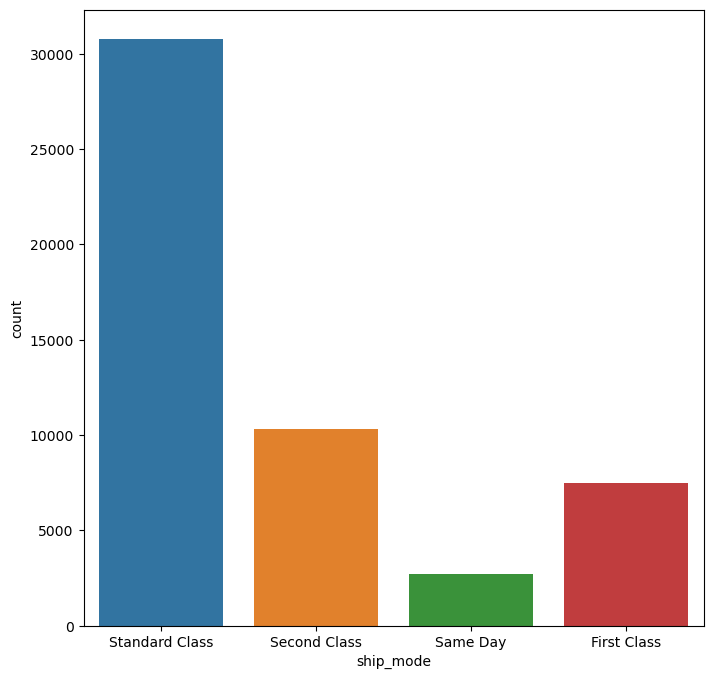

In [84]:
#Setting figure size
plt.figure(figsize=(8,8))

#Plotting ship modes
sns.countplot(salesdf['ship_mode'])

<h4> WHAT IS THE MOST PROFITABLE CATERGORY AND SUB-CATERGORY?

In [95]:
#Grouping products by Category and Subcatergory
profitable_cat_subcat = pd.DataFrame(salesdf.groupby(['category','sub_category']).sum()['profit'])

#Sorting by Category and Profit
profitable_cat_subcat.sort_values(['category','profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

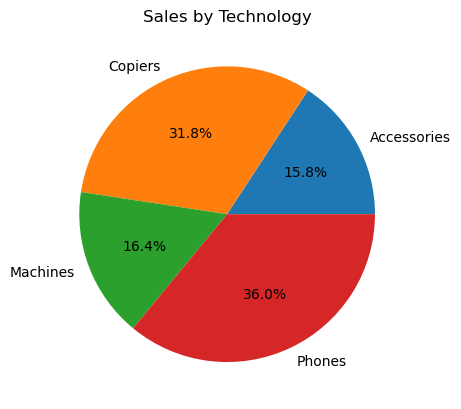

In [128]:
# Select Technology category and specific subcategories
Technology_sales = salesdf.loc[salesdf['category'] == 'Technology']
Technology_sales = Technology_sales.loc[Technology_sales['sub_category'].isin(['Machines', 'Copiers', 'Phones', 'Accessories'])]

# Group by subcategory and calculate the total sales
subcat_sales = Technology_sales.groupby('sub_category')['sales'].sum()

# Create a pie chart
plt.pie(subcat_sales, labels=subcat_sales.index, autopct='%1.1f%%')

# Add a title
plt.title('Sales by Technology')

# Display the chart
plt.show()


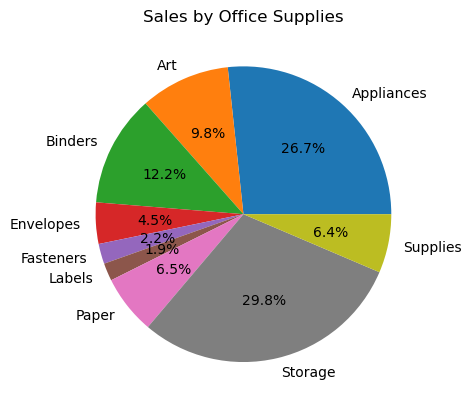

In [127]:
# Select Office Supplies category and specific subcategories
Office_Supplies = salesdf.loc[salesdf['category'] == 'Office Supplies']
Office_Supplies = Office_Supplies.loc[Office_Supplies['sub_category'].isin(['Storage', 'Supplies', 'Paper', 'Appliances', 'Labels', 'Art','Envelopes', 'Fasteners', 'Binders'])]

# Group by subcategory and calculate the total sales
subcat_sales = Office_Supplies.groupby('sub_category')['sales'].sum()

# Create a pie chart
plt.pie(subcat_sales, labels=subcat_sales.index, autopct='%1.1f%%')

# Add a title
plt.title('Sales by Office Supplies')

# Display the chart
plt.show()

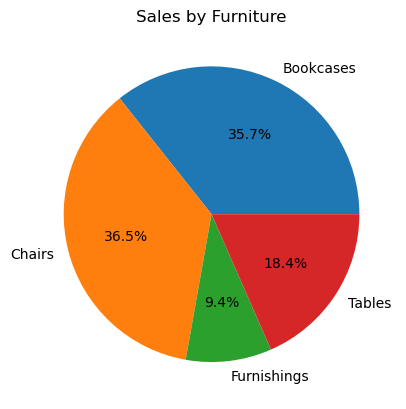

In [126]:
# Select Furniture category and specific subcategories
furniture_sales = salesdf.loc[salesdf['category'] == 'Furniture']
furniture_sales = furniture_sales.loc[furniture_sales['sub_category'].isin(['Bookcases', 'Chairs', 'Furnishings', 'Tables'])]

# Group by subcategory and calculate the total sales
subcat_sales = furniture_sales.groupby('sub_category')['sales'].sum()

# Create a pie chart
plt.pie(subcat_sales, labels=subcat_sales.index, autopct='%1.1f%%')

# Add a title
plt.title('Sales by Furniture')

# Display the chart
plt.show()